# # Level 3

**Basic Operation before starting the tasks.**


**(Dataset Observation)**

In [25]:
#Importing Libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime 
from collections import Counter
import plotly.express as px
from sklearn.cluster import KMeans
import calendar
import datetime 
import pandas as pd
import numpy as np

In [26]:
#Loading the dataset
df=pd.read_csv('Dataset .csv')

In [27]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [28]:
df.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9541,5905215,Emirgan S�_ti��,208,��stanbul,"Emirgan Mahallesi, Sak۱p Sabanc۱ Caddesi, No 4...",Emirg��n,"Emirg��n, ��stanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman K�_lt�_r,208,��stanbul,"Cafera��a Mahallesi, Ne��et �_mer Sokak, No 9/...",Kad۱k�_y Merkez,"Kad۱k�_y Merkez, ��stanbul",29.022805,40.989705,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9543,5916085,Dem Karak�_y,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...",Karak�_y,"Karak�_y, ��stanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977636,41.022904,"Desserts, B�_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9545,5915054,Baltazar,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, K۱l۱�_ ...",Karak�_y,"Karak�_y, ��stanbul",28.981103,41.025785,"Burger, Izgara",...,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [29]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [31]:
df.shape

(9551, 21)

In [32]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [33]:
df[df['Restaurant Name'].duplicated()==True].head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30
61,7301700,Garota de Ipanema,30,Rio de Janeiro,"Avenida Jo��o Alves, 56, Urca, Rio de Janeiro",Urca,"Urca, Rio de Janeiro",-43.162667,-22.947833,"Brazilian, Bar Food",...,Brazilian Real(R$),No,No,No,No,3,4.3,Green,Very Good,10
140,17294836,Rhinehart's Oyster Bar,216,Augusta,"303 North Bel Air Rd, Evans, GA 30809",Evans,"Evans, Augusta",-82.141284,33.521291,"Burger, Seafood",...,Dollar($),No,No,No,No,2,4.0,Green,Very Good,326
202,17330309,Mellow Mushroom,216,Columbus,"6100 Veterans Pkwy, Columbus, GA 31909",Columbus,"Columbus, Columbus",-84.955700,32.532100,Pizza,...,Dollar($),No,No,No,No,2,4.1,Green,Very Good,192


In [34]:
df[df['Restaurant Name']=='Silantro Fil-Mex']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294


In [35]:
df['Restaurant Name'].nunique()

7446

In [36]:
df1=pd.DataFrame(df['Country Code'].value_counts())
df1.head()

,count
Country Code,
1,8652
216,434
215,80
30,60
214,60


# Task 1

*Task: Restaurant Reviews*

**- Analyze the text reviews to identify the most
common positive and negative keywords.**

In [37]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [38]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)
     

['Excellent' 'Very Good' 'Good' 'Average']


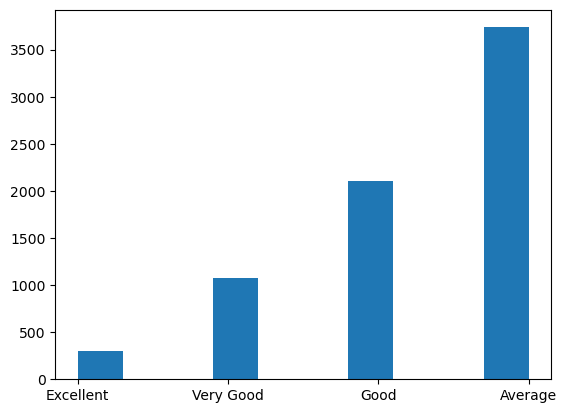

In [39]:
plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()

In [40]:
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


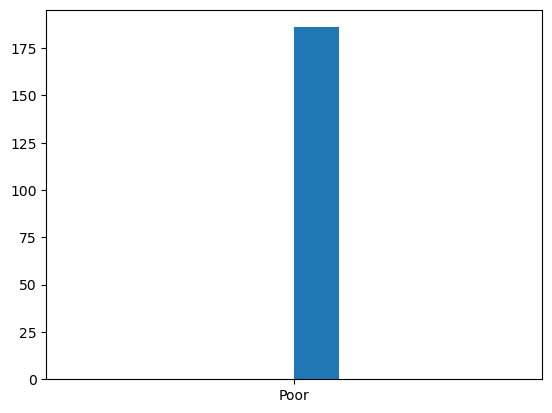

In [41]:
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

In [42]:
df_analyze=df[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

In [43]:
Rating_Review_lengith_df=pd.DataFrame(ave_rev_len).reset_index()
Rating_Review_lengith_df.head()

,Aggregate rating,Review Length
0,0.0,9.0
1,1.8,4.0
2,1.9,4.0
3,2.0,4.0
4,2.1,4.0


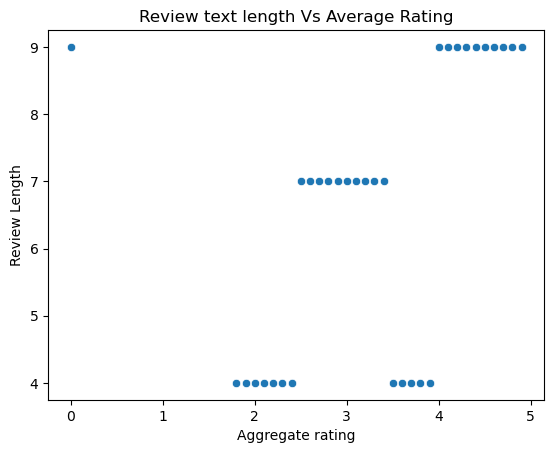

In [44]:
sns.scatterplot(x=Rating_Review_lengith_df['Aggregate rating'],y=Rating_Review_lengith_df['Review Length']);


plt.title('Review text length Vs Average Rating')
plt.show();

Based on the above two results, it can be stated that there is no strong linear correlation between aggregate rating and Review length.

In [45]:
corr, pval = stats.spearmanr(Rating_Review_lengith_df['Aggregate rating'], Rating_Review_lengith_df['Review Length'])
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.6184238739981055
p-value: 0.00012522124990312867


The Spearman's correlation coefficient is 0.618 which is between 0.41 and 0.7 , so there is a strong correlation, so there is a strong correlation between average rating and Review length.

# Task 2

*Task: Votes Analysis*

**- Identify the restaurants with the highest and
lowest number of votes.**

In [46]:
average_restorant_votes=df.groupby('Restaurant Name')['Votes'].mean().sort_values(ascending=False)
average_restorant_votes.head()

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
Name: Votes, dtype: float64

In [47]:
len(average_restorant_votes[average_restorant_votes==0])

907

In [51]:
corelation=np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation=np.round(corelation,2)
print(corelation)

[[1.   0.31]
 [0.31 1.  ]]


In [48]:
vote_raing_df=df.groupby('Restaurant Name')[['Votes','Aggregate rating']].mean()
vote_raing_df.head(20)

,Votes,Aggregate rating
Restaurant Name,,
#45,209.0,3.6
#Dilliwaala6,124.0,3.7
#InstaFreeze,2.0,0.0
#OFF Campus,216.0,3.7
#Urban Caf��,49.0,3.3
#hashtag,0.0,0.0
'Ohana,1151.0,4.5
10 Downing Street,335.0,4.0
10 To 10 In Delhi,73.0,3.8


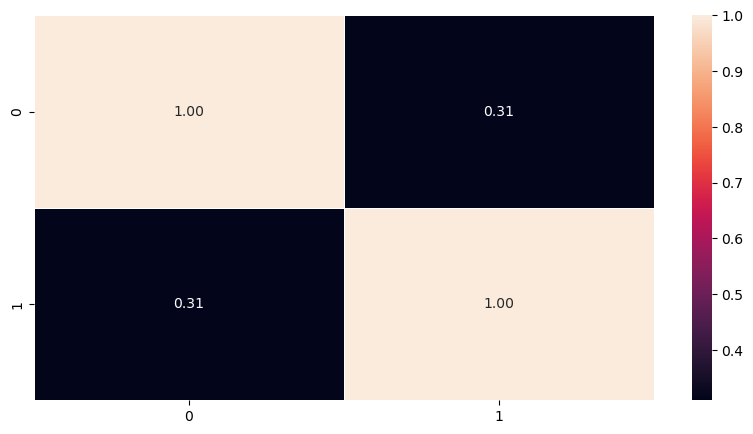

In [52]:
plt.figure(figsize=(10,5), dpi =100)
sns.heatmap(corelation,annot=True,fmt=".2f", linewidth=.4)
plt.show()

Text(0.5, 1.0, 'The Number of votes Vs The rating of restaurant')

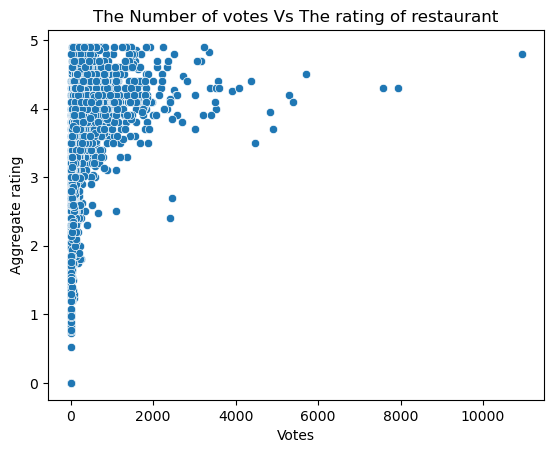

In [49]:
sns.scatterplot(x=vote_raing_df.Votes, y=vote_raing_df['Aggregate rating'])
plt.title('The Number of votes Vs The rating of restaurant')

In [50]:
corr=vote_raing_df.Votes.corr(vote_raing_df['Aggregate rating'])
corr

0.3312454181094535

Based on the above scatter plot and correlation result between aggregate rating and votes, the correlation between the two variables can be stated as low positive.

# Task 3

*Task: Price Range vs. Online Delivery and
Table Booking*

**- Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.**

In [53]:
price_online=df.groupby(['Price range','Has Online delivery']).size()
price_online=pd.DataFrame(price_online)
price_online.columns=['Restaurant_count']
price_online.reset_index(inplace=True)
price_online

,Price range,Has Online delivery,Restaurant_count
0,1,No,3743
1,1,Yes,701
2,2,No,1827
3,2,Yes,1286
4,3,No,997
5,3,Yes,411
6,4,No,533
7,4,Yes,53


<Axes: xlabel='Price range', ylabel='Restaurant_count'>

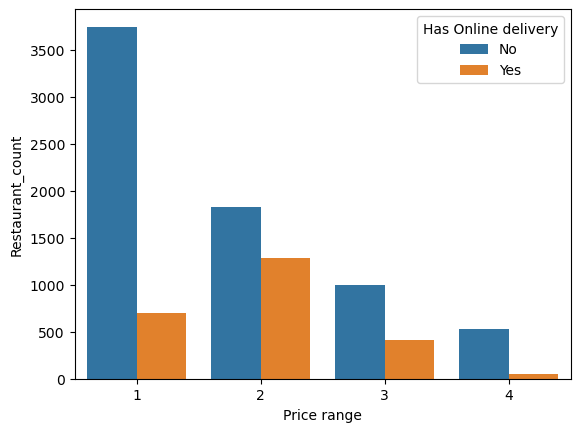

In [54]:
sns.barplot(x=price_online['Price range'],y=price_online['Restaurant_count'],hue=price_online['Has Online delivery'])

In [55]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

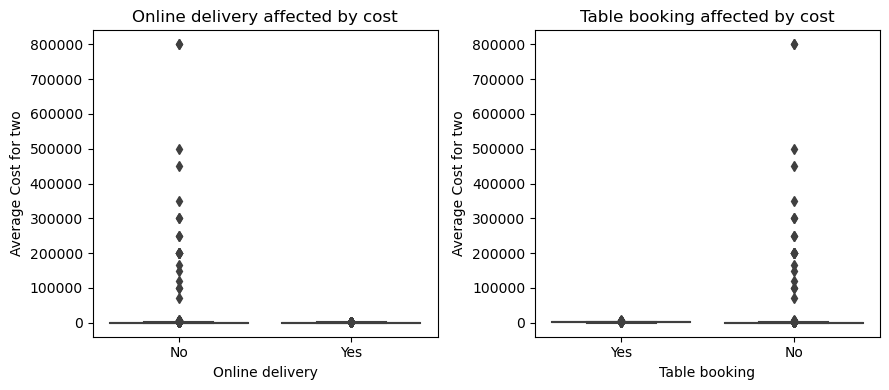

In [56]:

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

In [58]:
print("Both the Online delivery and Table booking are negetively impacted by the cost")
     

Both the Online delivery and Table booking are negetively impacted by the cost


In [59]:
price_Table_Booking=df.groupby(['Price range','Has Table booking']).size()
price_Table_Booking=pd.DataFrame(price_Table_Booking)
price_Table_Booking.columns=['Restaurant_count']
price_Table_Booking.reset_index(inplace=True)
price_Table_Booking

,Price range,Has Table booking,Restaurant_count
0,1,No,4443
1,1,Yes,1
2,2,No,2874
3,2,Yes,239
4,3,No,764
5,3,Yes,644
6,4,No,312
7,4,Yes,274


<Axes: xlabel='Price range', ylabel='Restaurant_count'>

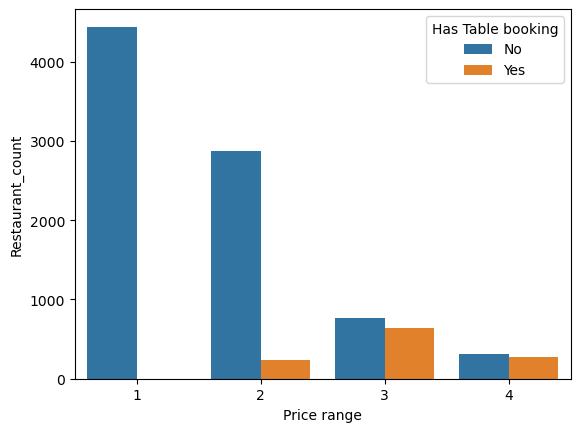

In [60]:
sns.barplot(x=price_Table_Booking['Price range'],y=price_Table_Booking['Restaurant_count'],hue=price_Table_Booking['Has Table booking'])

Based on the above two bar charts,

High price range restaurants offer table booking

Restaurants with price range 2 offer the highest online delivery, so price range and online delivery don't correlate positively.

# Conclusion AND Recommendation


**- From the analysis and visualization of the dataset, several key insights have emerged:**

The dataset comprises 9,551 entries and 21 columns, indicating that it includes information on 9,551 restaurants. Among these, there are 7,446 unique restaurants, with the remainder being chains of these establishments. Notably, 90.6% of the restaurants are located in India, and 95.13% are from India and the USA, suggesting that the dataset may not be fully representative of global restaurant trends.

The top three most common cuisines identified are North Indian, Chinese, and Fast Food, with 64.74% of restaurants serving at least one of these cuisines. Only 2.47% offer all three.

New Delhi stands out as the city with the highest number of restaurants at 5,473, followed by Gurgaon and Noida. The Inner City boasts the highest average rating of 4.9. There is a noticeable decline in the number of restaurants as price ranges increase, with only 25.7% offering online delivery. Restaurants that provide online delivery tend to have higher average ratings compared to those that do not.

The most common cuisine combinations are 'North Indian, Chinese', 'North Indian, Mughlai', and 'North Indian, Fast Food'.

While restaurants are distributed globally, there is a significant concentration in countries such as Canada, Australia, the USA, and India. The dataset includes 734 chains, defined as restaurants with at least two locations sharing the same name but having different IDs. As price ranges decrease, there is an increase in both the number of restaurants that do not offer online delivery and those that provide table booking options.

**Recommendations**

Given that 90.6% of the restaurants in this dataset are from India and that 95.13% are from India and the USA, it is crucial to acknowledge that this dataset may not be comprehensive or inclusive of global restaurant trends. Consequently, any conclusions drawn from this analysis should be approached with caution, as they may not accurately reflect the overall restaurant landscape.

To enhance the reliability and applicability of future analyses:
Expand the Dataset: Incorporate data from a broader range of countries and regions to ensure a more representative sample of global restaurant offerings.

Conduct Further Analysis: Once additional data is collected, perform a comprehensive analysis on this new dataset to derive insights that can be generalized beyond the current findings.

Avoid Bias in Decision-Making: Be cautious when applying insights from this dataset to make decisions regarding all restaurants globally, as such applications could lead to biased outcomes.

By following these recommendations, stakeholders can achieve a more accurate understanding of restaurant trends and improve decision-making processes in the industry.